In [113]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy.ma as ma

# Path style access for pandas
!pip install pandas-path
from pandas_path import path

import rasterio

import warnings
warnings.filterwarnings("ignore")

# Load data frame

In [29]:
# This is where our downloaded images and metadata live locally
DATA_PATH = Path.cwd().parent / "runtime" / "data" / "train_features"

In [30]:
train_metadata = pd.read_csv(
    DATA_PATH / "flood-training-metadata.csv", parse_dates=["scene_start"]
)

In [31]:
train_metadata.head()

,image_id,chip_id,flood_id,polarization,location,scene_start
0,awc00_vh,awc00,awc,vh,Bolivia,2018-02-15
1,awc00_vv,awc00,awc,vv,Bolivia,2018-02-15
2,awc01_vh,awc01,awc,vh,Bolivia,2018-02-15
3,awc01_vv,awc01,awc,vv,Bolivia,2018-02-15
4,awc02_vh,awc02,awc,vh,Bolivia,2018-02-15


In [32]:
train_metadata.shape

(1084, 6)

In [33]:
train_metadata.chip_id.nunique()

542

We have 542 unique chip id, every id has two images _vh and _vv

# Load path to data

In [34]:
train_metadata["nasadem"] = train_metadata["chip_id"] + "_nasadem"
train_metadata["change"] = train_metadata["chip_id"] + "_jrc-gsw-change"
train_metadata["extent"] = train_metadata["chip_id"] + "_jrc-gsw-extent"
train_metadata["occurrence"] = train_metadata["chip_id"] + "_jrc-gsw-occurrence"
train_metadata["recurrence"] = train_metadata["chip_id"] + "_jrc-gsw-recurrence"
train_metadata["seasonality"] = train_metadata["chip_id"] + "_jrc-gsw-seasonality"
train_metadata["transitions"] = train_metadata["chip_id"] + "_jrc-gsw-transitions"

In [35]:
train_metadata["feature_path"] = (str(DATA_PATH / "train_features")
    / train_metadata.image_id.path.with_suffix(".tif").path)

train_metadata["change"] = (str(DATA_PATH / "additional_features")
    / train_metadata.change.path.with_suffix(".tif").path)

train_metadata["extent"] = (str(DATA_PATH / "additional_features")
    / train_metadata.extent.path.with_suffix(".tif").path)

train_metadata["occurrence"] = (str(DATA_PATH / "additional_features")
    / train_metadata.occurrence.path.with_suffix(".tif").path)

train_metadata["recurrence"] = (str(DATA_PATH / "additional_features")
    / train_metadata.recurrence.path.with_suffix(".tif").path)

train_metadata["seasonality"] = (str(DATA_PATH / "additional_features")
    / train_metadata.seasonality.path.with_suffix(".tif").path)

train_metadata["transitions"] = (str(DATA_PATH / "additional_features")
    / train_metadata.transitions.path.with_suffix(".tif").path)

train_metadata["nasadem"] = (str(DATA_PATH / "additional_features")
    / train_metadata.nasadem.path.with_suffix(".tif").path)

train_metadata["label_path"] = (str(DATA_PATH / "train_labels")
    / train_metadata.chip_id.path.with_suffix(".tif").path)

In [36]:
train_metadata

,image_id,chip_id,flood_id,polarization,location,scene_start,nasadem,change,extent,occurrence,recurrence,seasonality,transitions,feature_path,label_path
0,awc00_vh,awc00,awc,vh,Bolivia,2018-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...
1,awc00_vv,awc00,awc,vv,Bolivia,2018-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...
2,awc01_vh,awc01,awc,vh,Bolivia,2018-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...
3,awc01_vv,awc01,awc,vv,Bolivia,2018-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...
4,awc02_vh,awc02,awc,vh,Bolivia,2018-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,wvy29_vv,wvy29,wvy,vv,UK,2019-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...
1080,wvy30_vh,wvy30,wvy,vh,UK,2019-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...
1081,wvy30_vv,wvy30,wvy,vv,UK,2019-02-15,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJEC...,C:\Users\maxlu\Desktop\Machine_Learning\PROJE

# Display data

In [118]:
def numpy_mask(image_path):
    with rasterio.open(image_path) as img:
        metadata = img.meta
        bounds = img.bounds
        data = img.read(1)  # read a single band

    with rasterio.open(image_path) as img:
        return img.read(1)
    

def display_chip(row):
    f, ax = plt.subplots(3, 4, figsize=(15, 15))

    # Select a random chip from train_metadata
    #random_chip = train_metadata.chip_id.sample(random_state=random_state).values[0]
    chip_df = train_metadata.iloc[row*2:row*2+2]
    
    label = numpy_mask(chip_df.label_path.values[0])
    mask = np.zeros(label.shape, dtype=np.uint8)
    mask[np.where(label == 255)] = 1

    # Extract paths to image files
    vv = ma.array(numpy_mask(chip_df[chip_df.polarization == "vv"].feature_path.values[0]), mask = mask)
    vh = ma.array(numpy_mask(chip_df[chip_df.polarization == "vh"].feature_path.values[0]), mask = mask)
    
    nasadem = ma.array(numpy_mask(chip_df.nasadem.values[0]), mask = mask)
    change = ma.array(numpy_mask(chip_df.change.values[0]), mask = mask)
    extent = ma.array(numpy_mask(chip_df.extent.values[0]), mask = mask)
    occurrence = ma.array(numpy_mask(chip_df.occurrence.values[0]), mask = mask)
    recurrence = ma.array(numpy_mask(chip_df.recurrence.values[0]), mask = mask)
    seasonality = ma.array(numpy_mask(chip_df.seasonality.values[0]), mask = mask)
    transitions = ma.array(numpy_mask(chip_df.transitions.values[0]), mask = mask)

    #visualize radar image
    ax[0][0].imshow(vv)
    ax[0][0].set_title("Vertical-vertical band")
    ax[0][1].imshow(vh)
    ax[0][1].set_title("Vertical-horizontal band")
    
    #visualize answer
    ax[0][2].imshow(label, cmap="gray")
    ax[0][2].set_title("Label")
    
    #visualize additional data
    ax[0][3].imshow(nasadem)
    ax[0][3].set_title("nasadem")
    ax[1][0].imshow(change)
    ax[1][0].set_title("change")
    ax[1][1].imshow(extent)
    ax[1][1].set_title("extent")
    ax[1][2].imshow(occurrence)
    ax[1][2].set_title("occurrence")
    ax[1][3].imshow(recurrence)
    ax[1][3].set_title("recurrence")
    ax[2][0].imshow(seasonality)
    ax[2][0].set_title("seasonality")
    ax[2][1].imshow(transitions)
    ax[2][1].set_title("transitions")
    
    
    #mask
    
    
    print("max vv:", np.amax(vv), "min vv:", np.amin(vv))
    print("max vh:", np.amax(vh), "min vh:", np.amin(vh))
    print("max label:", np.amax(label), "min label:", np.amin(label))
    print("max nasadem:", np.amax(nasadem), "min nasadem:", np.amin(nasadem))
    print("max change:", np.amax(change), "min change:", np.amin(change))
    print("max extent:", np.amax(extent), "min extent:", np.amin(extent))
    print("max occurrence:", np.amax(occurrence), "min occurrence:", np.amin(occurrence))
    print("max recurrence:", np.amax(recurrence), "min recurrence:", np.amin(recurrence))
    print("max seasonality:", np.amax(seasonality), "min seasonality:", np.amin(seasonality))
    print("max transitions:", np.amax(transitions), "min transitions:", np.amin(transitions))
    
    plt.show()

max vv: -1.1249876 min vv: -46.65592
max vh: -6.1905417 min vh: -56.406128
max label: 255 min label: 0
max nasadem: 170 min nasadem: 142
max change: 253 min change: 0
max extent: 1 min extent: 0
max occurrence: 1 min occurrence: 0
max recurrence: 54 min recurrence: 0
max seasonality: 0 min seasonality: 0
max transitions: 10 min transitions: 0


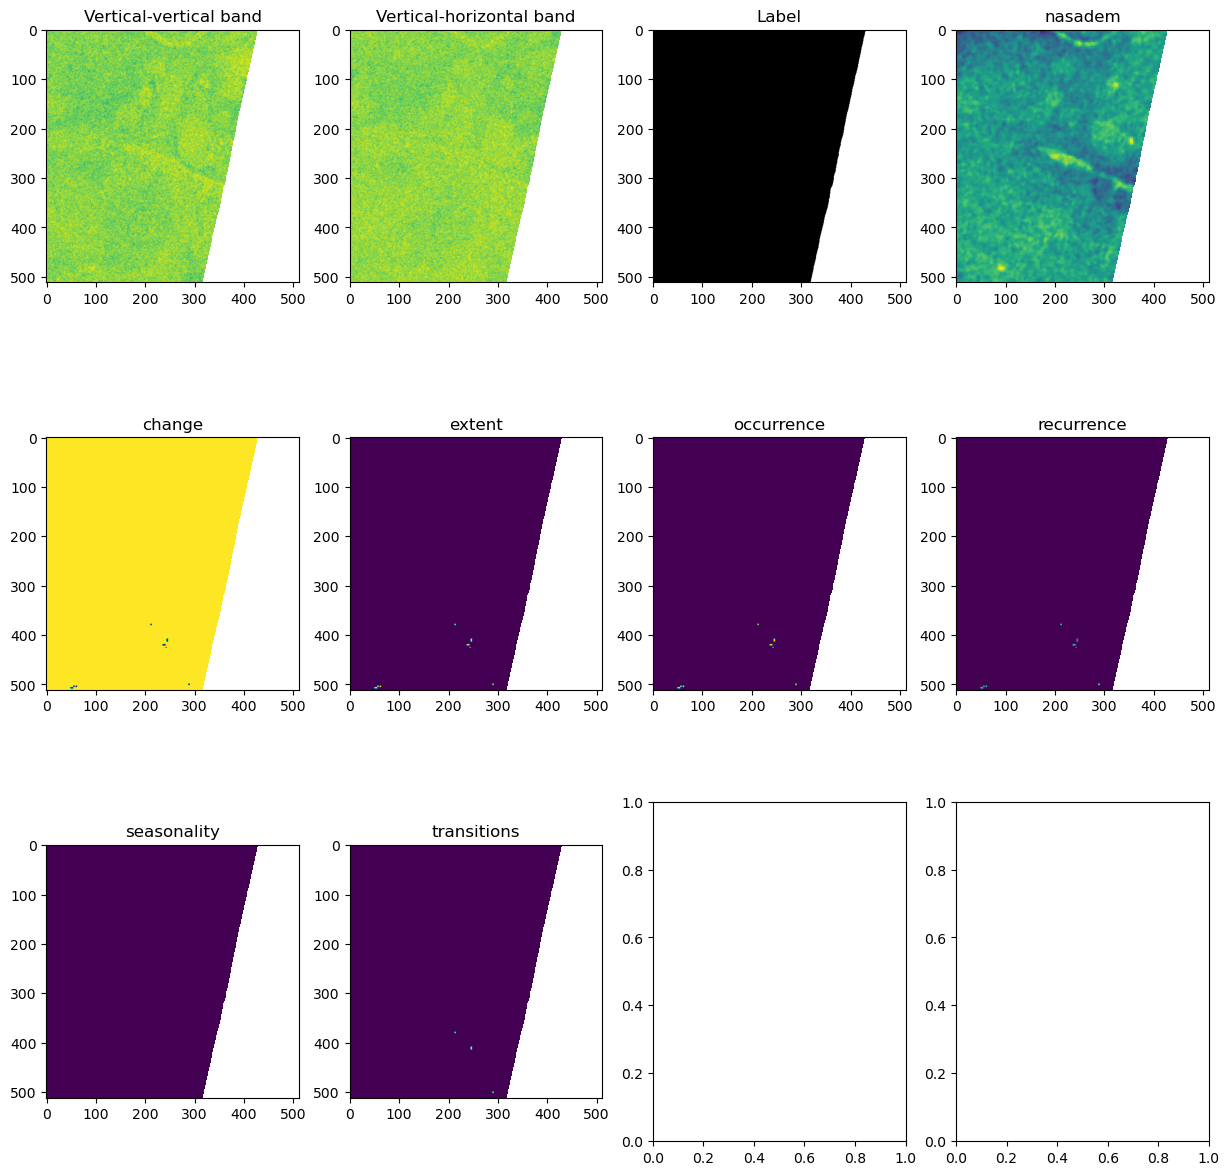

In [121]:
display_chip(0)